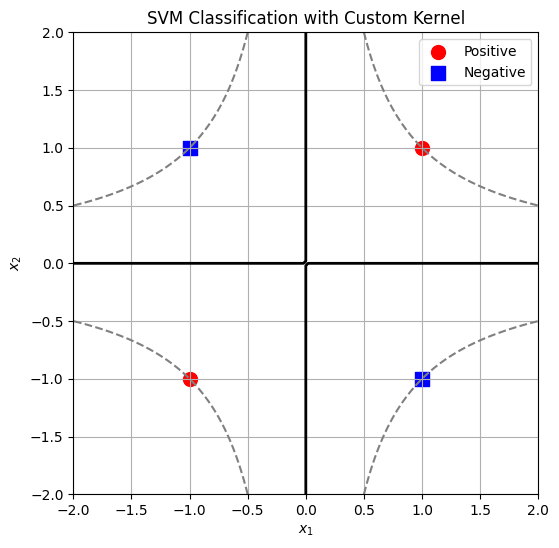

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Training data
X = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1]])
y = np.array([1, 1, -1, -1])  # Labels: 1 for positive, -1 for negative

# Custom kernel function
def custom_kernel(X, Y):
    return 1 + np.dot(X, Y.T) + (X[:, 0:1] * X[:, 1:2]) @ (Y[:, 0:1] * Y[:, 1:2]).T

# SVM with custom kernel
clf = SVC(kernel=custom_kernel)
clf.fit(X, y)

# Plotting
plt.figure(figsize=(6, 6))

# Plotting the data points
for i, label in enumerate(y):
    if label == 1:
        plt.scatter(X[i, 0], X[i, 1], color='red', marker='o', s=100, label='Positive' if i == 0 else '')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='blue', marker='s', s=100, label='Negative' if i == 2 else '')

# Plotting the decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = clf.decision_function(xy).reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')  # Decision boundary
plt.contour(xx, yy, Z, levels=[-1, 1], linestyles=['--', '--'], colors='gray')  # Margins

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.title('SVM Classification with Custom Kernel')
plt.show()
